# **Cab Booking System**
Cab booking system is the process where renting  a  cab  is  automated  through  an app  throughout  a  city.  Using  this  app people can book a cab from one location to another location.  Being a cab booking app company, exploiting an understanding of cab supply and demand could   increase   the   efficiency   of   their service  and  enhance  user  experience  by minimizing waiting time.

Objective  of  this  project  is  to  combine historical  usage  pattern  along  with  the open  data  sources  like  weather  data  to forecast cab booking demand in a city

## **Importing  libraries**





In [ ]:
#importing Required libraries

import numpy as np 
#NumPy: A Python library used for working with arrays

import pandas as pd 
#Pandas: Open-Source Python package widely used for data science/data analysis and machine learning tasks

import matplotlib.pyplot as plt 
#Matplotlib: A library for creating static, animated, and interactive visualizations in Python

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor , BaggingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error,r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
print('All libraries imported')

All libraries imported


Extracting Zip file

In [ ]:
from zipfile import ZipFile
with ZipFile ('/content/project 1 - data_0gr_q8j5a1j.zip','r') as zp:
  zp.extractall()

## **Importing train data and test data**

In [ ]:
train_d = pd.read_csv('/content/data/train.csv')
train_d.head()

datetime  season  holiday  workingday              weather   temp  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34   

    atemp  humidity  windspeed  
0  25.760        77    16.9979  
1  33.335        79    19.0012  
2   6.060        50    22.0028  
3  16.665        29     8.9981  
4  33.335        51    19.0012

In [ ]:
test_d = pd.read_csv('/content/data/test.csv')
test_d.head()

datetime  season  holiday  workingday                  weather  \
0   5/10/2012 11:00  Summer        0           1       Clear + Few clouds   
1     6/9/2012 7:00  Summer        0           0       Clear + Few clouds   
2    3/6/2011 20:00  Spring        0           0   Light Snow, Light Rain   
3  10/13/2011 11:00  Winter        0           1           Mist + Cloudy    
4    6/2/2012 12:00  Summer        0           0       Clear + Few clouds   

    temp   atemp  humidity  windspeed  
0  21.32  25.000        48    35.0008  
1  23.78  27.275        64     7.0015  
2  11.48  12.120       100    27.9993  
3  25.42  28.790        83     0.0000  
4  25.42  31.060        43    23.9994

Importing train_label and test_label data


In [ ]:
train_l = pd.read_csv('/content/data/train_label.csv',header=None, names=['Total_Booking'])
train_l.head()

Total_Booking
0            504
1              5
2            139
3            209
4            184

In [ ]:
test_l = pd.read_csv('/content/data/test_label.csv',header=None, names=['Total_Booking'])
test_l.head()

Total_Booking
0            256
1             87
2             11
3             84
4            668

Concatenating the train and train label data in dt_train variable


In [ ]:
dt_train = pd.concat([train_d,train_l], axis=1,ignore_index=False)
dt_train.head()

datetime  season  holiday  workingday              weather   temp  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34   

    atemp  humidity  windspeed  Total_Booking  
0  25.760        77    16.9979            504  
1  33.335        79    19.0012              5  
2   6.060        50    22.0028            139  
3  16.665        29     8.9981            209  
4  33.335        51    19.0012            184

Concatenating the test and test label data in dt_test variable

In [ ]:
dt_test = pd.concat([test_d,test_l], axis=1,ignore_index=False)
dt_test.head()

datetime  season  holiday  workingday                  weather  \
0   5/10/2012 11:00  Summer        0           1       Clear + Few clouds   
1     6/9/2012 7:00  Summer        0           0       Clear + Few clouds   
2    3/6/2011 20:00  Spring        0           0   Light Snow, Light Rain   
3  10/13/2011 11:00  Winter        0           1           Mist + Cloudy    
4    6/2/2012 12:00  Summer        0           0       Clear + Few clouds   

    temp   atemp  humidity  windspeed  Total_Booking  
0  21.32  25.000        48    35.0008            256  
1  23.78  27.275        64     7.0015             87  
2  11.48  12.120       100    27.9993             11  
3  25.42  28.790        83     0.0000             84  
4  25.42  31.060        43    23.9994            668

## **Analyzing the dataset**


Checking the shape of the training and testing set

In [ ]:
dt_train.shape

(8708, 10)

In [ ]:
dt_test.shape

(2178, 10)

Data type of each columns

In [ ]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_Booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


In [ ]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       2178 non-null   object 
 1   season         2178 non-null   object 
 2   holiday        2178 non-null   int64  
 3   workingday     2178 non-null   int64  
 4   weather        2178 non-null   object 
 5   temp           2178 non-null   float64
 6   atemp          2178 non-null   float64
 7   humidity       2178 non-null   int64  
 8   windspeed      2178 non-null   float64
 9   Total_Booking  2178 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 170.3+ KB


In [ ]:
dt_train.describe()

holiday   workingday         temp        atemp     humidity  \
count  8708.000000  8708.000000  8708.000000  8708.000000  8708.000000   
mean      0.028480     0.680294    20.243020    23.655552    61.649173   
std       0.166348     0.466389     7.813494     8.501107    19.199578   
min       0.000000     0.000000     0.820000     0.760000     0.000000   
25%       0.000000     0.000000    13.940000    16.665000    46.000000   
50%       0.000000     1.000000    20.500000    24.240000    61.000000   
75%       0.000000     1.000000    26.240000    31.060000    77.000000   
max       1.000000     1.000000    41.000000    45.455000   100.000000   

         windspeed  Total_Booking  
count  8708.000000    8708.000000  
mean     12.843891     193.007005  
std       8.190314     181.552211  
min       0.000000       1.000000  
25%       7.001500      43.000000  
50%      12.998000     148.000000  
75%      16.997900     286.000000  
max      56.996900     977.000000

In [ ]:

dt_train.dtypes.value_counts()

int64      4
object     3
float64    3
dtype: int64

Checking any Misiing value present in train dataset


In [ ]:
dt_train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

NO missing value present

## **Feature Engineering**


Create new columns date, hour, weekDay, month from datetime column

In [ ]:
dt_train.head()

datetime  season  holiday  workingday              weather   temp  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34   

    atemp  humidity  windspeed  Total_Booking  
0  25.760        77    16.9979            504  
1  33.335        79    19.0012              5  
2   6.060        50    22.0028            139  
3  16.665        29     8.9981            209  
4  33.335        51    19.0012            184

In [ ]:
#separating and adding new columns in train dataset 
dt_train['datetime'] = pd.to_datetime(dt_train['datetime'])
dt_train['date'] = pd.to_datetime(dt_train['datetime']).dt.date
dt_train['hour'] = pd.to_datetime(dt_train['datetime']).dt.time
dt_train['WeekDay'] = dt_train['datetime'].dt.day_name()
dt_train['Month'] = dt_train['datetime'].dt.strftime('%b')

In [ ]:
dt_train.head()

datetime  season  holiday  workingday              weather  \
0 2012-05-02 19:00:00  Summer        0           1   Clear + Few clouds   
1 2012-09-05 04:00:00    Fall        0           1   Clear + Few clouds   
2 2011-01-13 09:00:00  Spring        0           1   Clear + Few clouds   
3 2011-11-18 16:00:00  Winter        0           1   Clear + Few clouds   
4 2011-09-13 13:00:00    Fall        0           1   Clear + Few clouds   

    temp   atemp  humidity  windspeed  Total_Booking        date      hour  \
0  22.14  25.760        77    16.9979            504  2012-05-02  19:00:00   
1  28.70  33.335        79    19.0012              5  2012-09-05  04:00:00   
2   5.74   6.060        50    22.0028            139  2011-01-13  09:00:00   
3  13.94  16.665        29     8.9981            209  2011-11-18  16:00:00   
4  30.34  33.335        51    19.0012            184  2011-09-13  13:00:00   

     WeekDay Month  
0  Wednesday   May  
1  Wednesday   Sep  
2   Thursday   Jan  
3     Friday   Nov  
4    Tuesday   Sep

In [ ]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8708 non-null   datetime64[ns]
 1   season         8708 non-null   object        
 2   holiday        8708 non-null   int64         
 3   workingday     8708 non-null   int64         
 4   weather        8708 non-null   object        
 5   temp           8708 non-null   float64       
 6   atemp          8708 non-null   float64       
 7   humidity       8708 non-null   int64         
 8   windspeed      8708 non-null   float64       
 9   Total_Booking  8708 non-null   int64         
 10  date           8708 non-null   object        
 11  hour           8708 non-null   object        
 12  WeekDay        8708 non-null   object        
 13  Month          8708 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 952.

In [ ]:
dt_test['datetime'] = pd.to_datetime(dt_test['datetime'])
dt_test['date'] = pd.to_datetime(dt_test['datetime']).dt.date
dt_test['hour'] = pd.to_datetime(dt_test['datetime']).dt.time
dt_test['WeekDay'] = dt_test['datetime'].dt.day_name()
dt_test['Month'] = dt_test['datetime'].dt.strftime('%b')

In [ ]:
dt_test.head()

datetime  season  holiday  workingday                  weather  \
0 2012-05-10 11:00:00  Summer        0           1       Clear + Few clouds   
1 2012-06-09 07:00:00  Summer        0           0       Clear + Few clouds   
2 2011-03-06 20:00:00  Spring        0           0   Light Snow, Light Rain   
3 2011-10-13 11:00:00  Winter        0           1           Mist + Cloudy    
4 2012-06-02 12:00:00  Summer        0           0       Clear + Few clouds   

    temp   atemp  humidity  windspeed  Total_Booking        date      hour  \
0  21.32  25.000        48    35.0008            256  2012-05-10  11:00:00   
1  23.78  27.275        64     7.0015             87  2012-06-09  07:00:00   
2  11.48  12.120       100    27.9993             11  2011-03-06  20:00:00   
3  25.42  28.790        83     0.0000             84  2011-10-13  11:00:00   
4  25.42  31.060        43    23.9994            668  2012-06-02  12:00:00   

    WeekDay Month  
0  Thursday   May  
1  Saturday   Jun  
2    Sunday   Mar  
3  Thursday   Oct  
4  Saturday   Jun

Convert the datatype of season, holiday, workingday, and weather to category

In [ ]:
dt_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Total_Booking', 'date', 'hour',
       'WeekDay', 'Month'],
      dtype='object')

In [ ]:
dt_train[['season','holiday','workingday','weather']] = dt_train[['season','holiday','workingday','weather']].astype('category')

In [ ]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8708 non-null   datetime64[ns]
 1   season         8708 non-null   category      
 2   holiday        8708 non-null   category      
 3   workingday     8708 non-null   category      
 4   weather        8708 non-null   category      
 5   temp           8708 non-null   float64       
 6   atemp          8708 non-null   float64       
 7   humidity       8708 non-null   int64         
 8   windspeed      8708 non-null   float64       
 9   Total_Booking  8708 non-null   int64         
 10  date           8708 non-null   object        
 11  hour           8708 non-null   object        
 12  WeekDay        8708 non-null   object        
 13  Month          8708 non-null   object        
dtypes: category(4), datetime64[ns](1), float64(3), int64(2), object(4)
memor

Drop the datetime column as we have already extracted useful features from it

In [ ]:
dt_train = dt_train.drop(['datetime'], axis=1)

In [ ]:
dt_test = dt_test.drop(['datetime'], axis=1)

In [ ]:
dt_train.head()

season holiday workingday              weather   temp   atemp  humidity  \
0  Summer       0          1   Clear + Few clouds  22.14  25.760        77   
1    Fall       0          1   Clear + Few clouds  28.70  33.335        79   
2  Spring       0          1   Clear + Few clouds   5.74   6.060        50   
3  Winter       0          1   Clear + Few clouds  13.94  16.665        29   
4    Fall       0          1   Clear + Few clouds  30.34  33.335        51   

   windspeed  Total_Booking        date      hour    WeekDay Month  
0    16.9979            504  2012-05-02  19:00:00  Wednesday   May  
1    19.0012              5  2012-09-05  04:00:00  Wednesday   Sep  
2    22.0028            139  2011-01-13  09:00:00   Thursday   Jan  
3     8.9981            209  2011-11-18  16:00:00     Friday   Nov  
4    19.0012            184  2011-09-13  13:00:00    Tuesday   Sep

## **Outlier Analysis**

In [ ]:
dt_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_Booking', 'date', 'hour', 'WeekDay',
       'Month'],
      dtype='object')

season
holiday
workingday
weather
temp
atemp
humidity
windspeed
Total_Booking


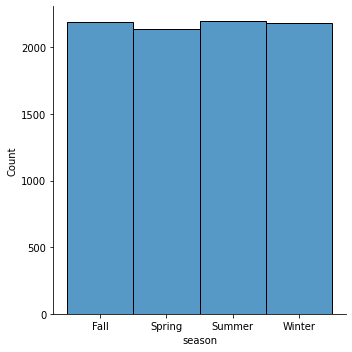

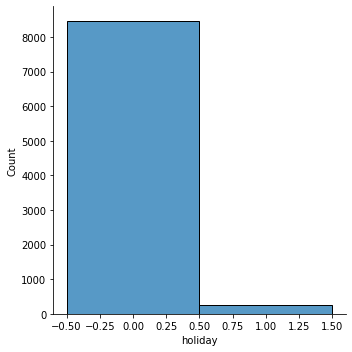

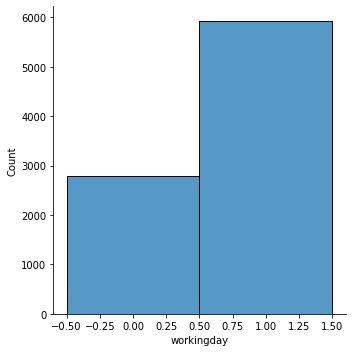

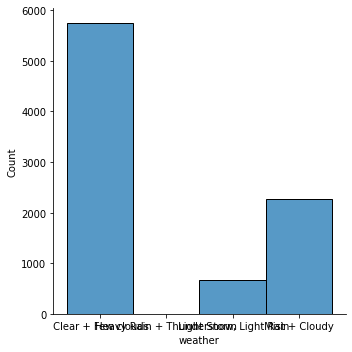

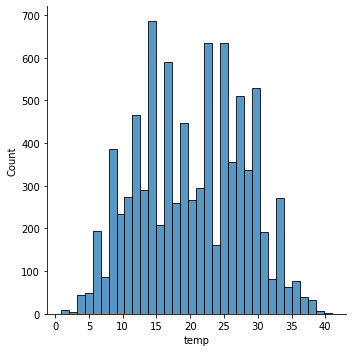

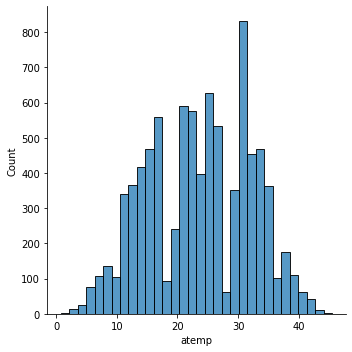

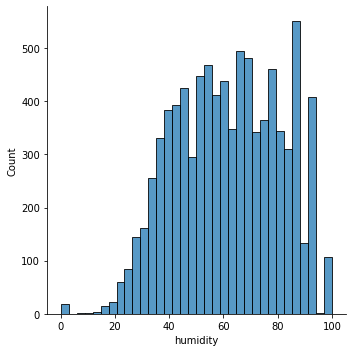

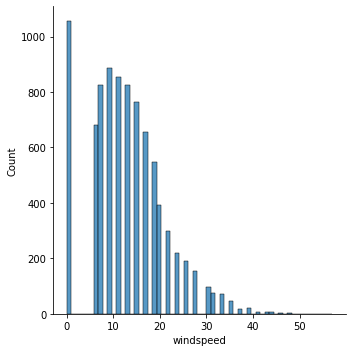

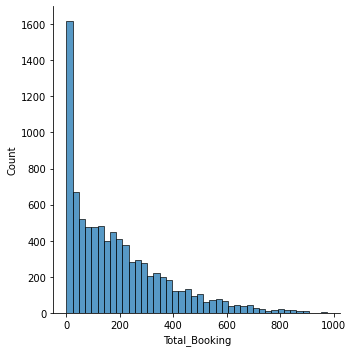

In [ ]:
for i in dt_train.select_dtypes(exclude='object').columns:
  print(i)
  sns.displot(dt_train[i])
  

- Holiday and working data are imbalance
- where TotalBooking and windspeed data are right skewed.

In [ ]:
dt_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_Booking', 'date', 'hour', 'WeekDay',
       'Month'],
      dtype='object')

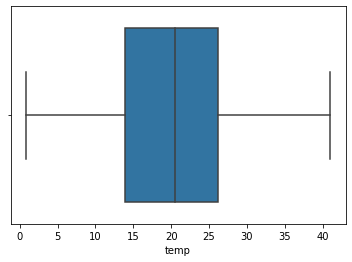

In [ ]:
sns.boxplot(x='temp' , data=dt_train)

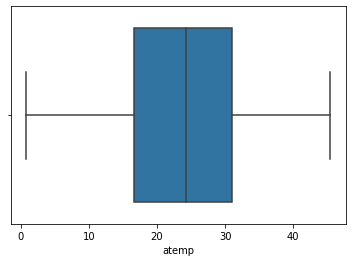

In [ ]:

sns.boxplot(x='atemp' , data=dt_train)

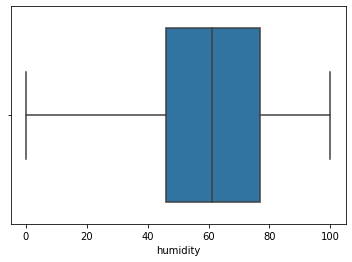

In [ ]:
sns.boxplot(x='humidity' , data=dt_train)

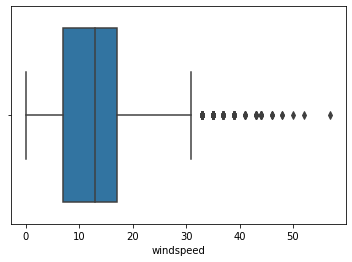

In [ ]:
sns.boxplot(x = 'windspeed', data=dt_train)

There is no outliers in temp, atemp, humidity except windspeed
so we need to cap them

Removing the outlier in Windspeed.

In [ ]:
q1 = dt_train['windspeed'].quantile(0.25)
q3 = dt_train['windspeed'].quantile(0.75)
IQR = q3-q1
dt_train['windspeed'] = np.clip(dt_train['windspeed'],q1-1.5*IQR , q3+1.5*IQR)

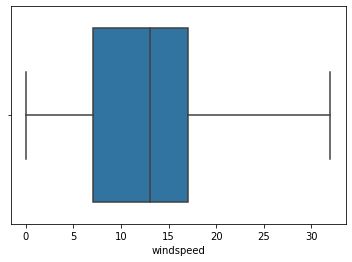

In [ ]:
sns.boxplot(x='windspeed', data= dt_train)

<function matplotlib.pyplot.show(*args, **kw)>

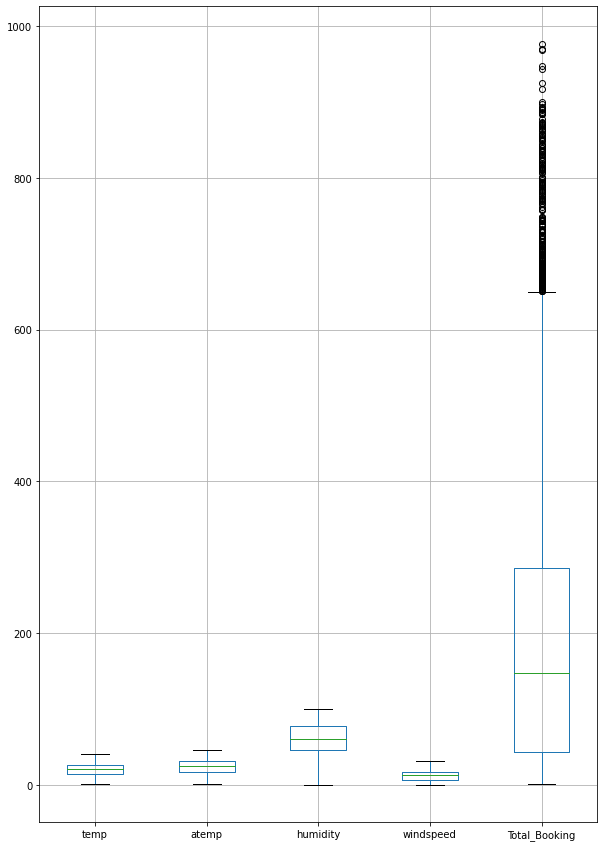

In [ ]:
dt_train.boxplot(figsize=(10,15))
plt.show

- Now we can see there are no outlier left.
- Total Booking outlier is acceptable as they are close to each other.

## **Correlation Analysis:**

Text(0.5, 1.0, 'Correlation')

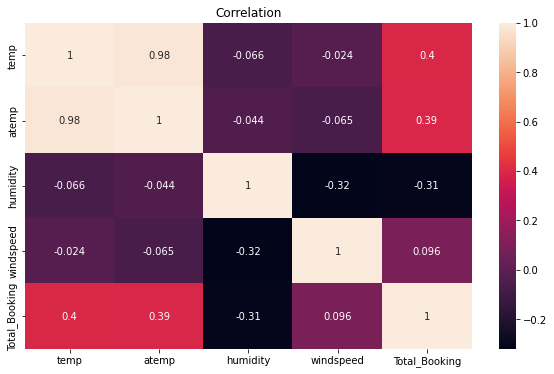

In [ ]:
corr = dt_train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation')

In [ ]:
#Total_Booking and Humidity are negative correltaed to each other and windspeed and humidity are also neh=gative correlated to each other.

## **Data Visualization:**

Visualize distribution of data: total_booking column and plot the probability 
distribution plot for the column as well

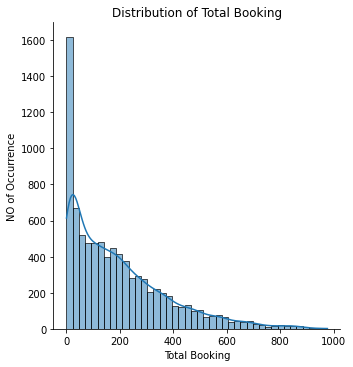

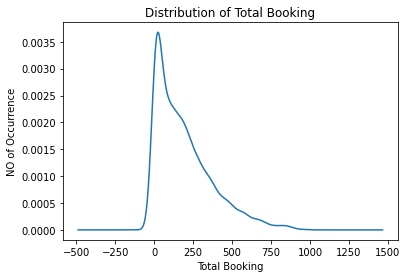

In [ ]:
sns.displot(dt_train , x = 'Total_Booking', kde=True)
plt.xlabel('Total Booking')
plt.ylabel('NO of Occurrence')
plt.title('Distribution of Total Booking')
plt.show()

dt_train['Total_Booking'].plot(kind='density')
plt.xlabel('Total Booking')
plt.ylabel('NO of Occurrence')
plt.title('Distribution of Total Booking')
plt.show()

Has we can see its highly Right skewed

Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)

In [ ]:
dt_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_Booking', 'date', 'hour', 'WeekDay',
       'Month'],
      dtype='object')

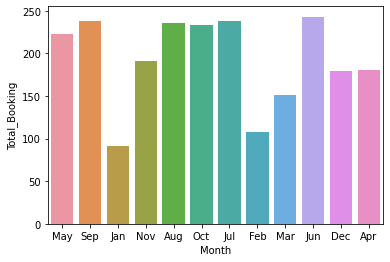

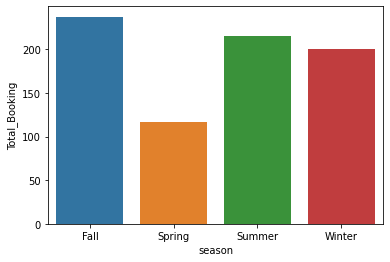

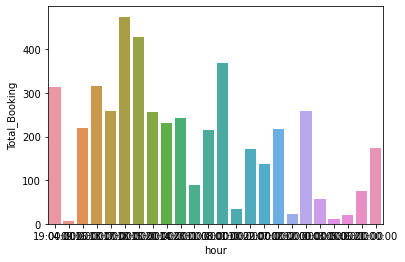

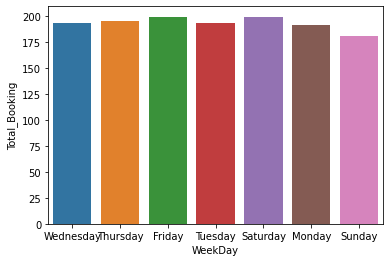

In [ ]:
for i in ['Month','season','hour','WeekDay']:
  sns.barplot(x=dt_train[i], y=dt_train['Total_Booking'], ci=0) 
  plt.show()
print()

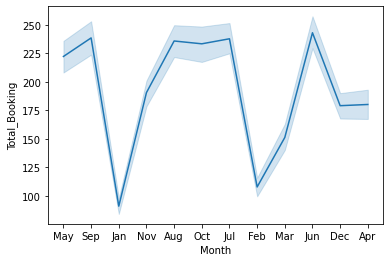

In [ ]:

sns.lineplot(x='Month', y='Total_Booking', data= dt_train)

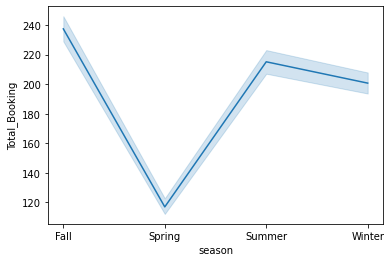

In [ ]:
sns.lineplot(x='season', y='Total_Booking', data= dt_train)

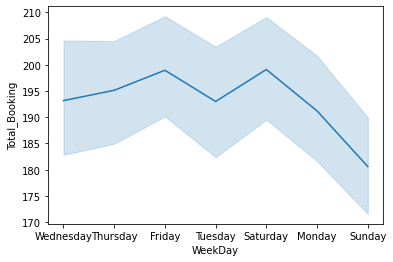

In [ ]:
sns.lineplot(x='WeekDay', y='Total_Booking', data= dt_train)

Use Histograms to plot all the continuous variables present in the data


season


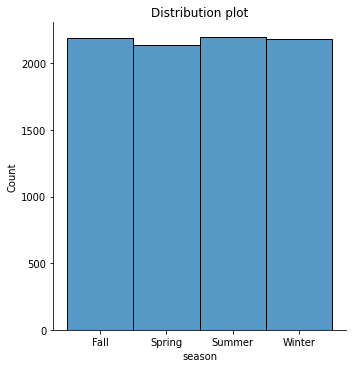

holiday


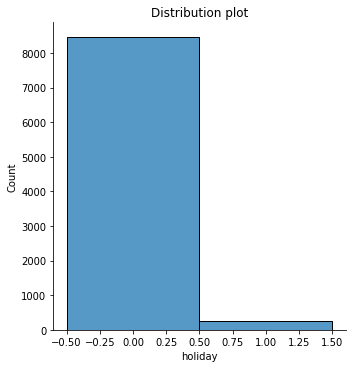

workingday


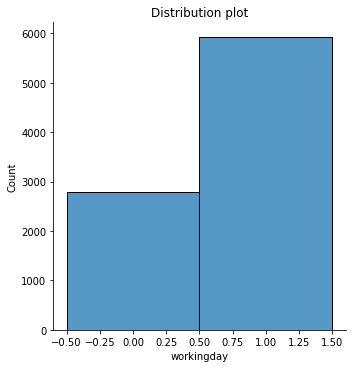

weather


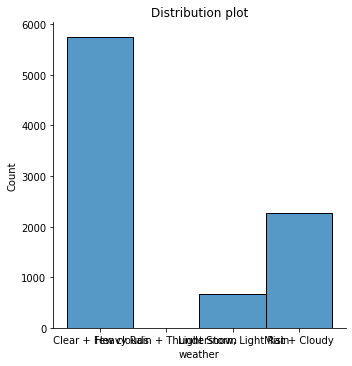

temp


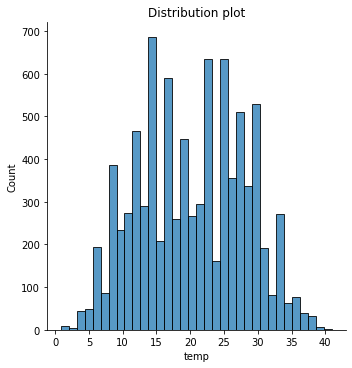

atemp


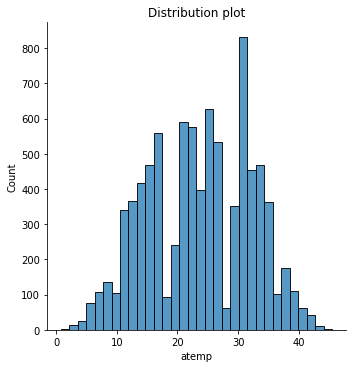

humidity


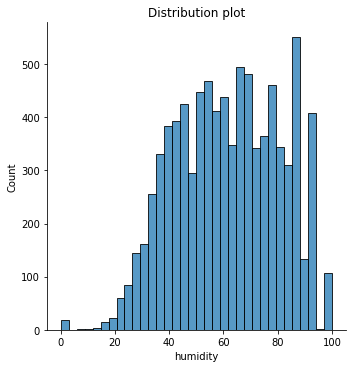

windspeed


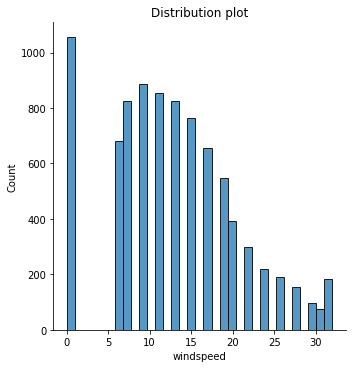

Total_Booking


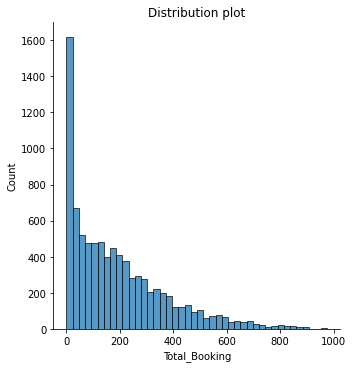

In [ ]:
for cols in dt_train.select_dtypes(exclude='object'):
  print(cols)
  sns.displot(dt_train[cols])
  plt.title('Distribution plot')
  plt.show()

## **Concate the full data**

In [ ]:
full_data = pd.concat([dt_train,dt_test])

In [ ]:
full_data.head()

season  holiday  workingday              weather   temp   atemp  humidity  \
0  Summer        0           1   Clear + Few clouds  22.14  25.760        77   
1    Fall        0           1   Clear + Few clouds  28.70  33.335        79   
2  Spring        0           1   Clear + Few clouds   5.74   6.060        50   
3  Winter        0           1   Clear + Few clouds  13.94  16.665        29   
4    Fall        0           1   Clear + Few clouds  30.34  33.335        51   

   windspeed  Total_Booking        date      hour    WeekDay Month  
0    16.9979            504  2012-05-02  19:00:00  Wednesday   May  
1    19.0012              5  2012-09-05  04:00:00  Wednesday   Sep  
2    22.0028            139  2011-01-13  09:00:00   Thursday   Jan  
3     8.9981            209  2011-11-18  16:00:00     Friday   Nov  
4    19.0012            184  2011-09-13  13:00:00    Tuesday   Sep

In [ ]:
full_data.shape

(10886, 13)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2177
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         10886 non-null  object 
 1   holiday        10886 non-null  int64  
 2   workingday     10886 non-null  int64  
 3   weather        10886 non-null  object 
 4   temp           10886 non-null  float64
 5   atemp          10886 non-null  float64
 6   humidity       10886 non-null  int64  
 7   windspeed      10886 non-null  float64
 8   Total_Booking  10886 non-null  int64  
 9   date           10886 non-null  object 
 10  hour           10886 non-null  object 
 11  WeekDay        10886 non-null  object 
 12  Month          10886 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.2+ MB


In [ ]:
full_data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_Booking', 'date', 'hour', 'WeekDay',
       'Month'],
      dtype='object')

In [ ]:
full_data.dtypes.value_counts()

object     6
int64      4
float64    3
dtype: int64

## **Explanatory Data Analysis on full data**

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 21.9 MB 142 kB/s
     |████████████████████████████████| 102 kB 6.6 MB/s 
     |████████████████████████████████| 690 kB 40.3 MB/s 
     |████████████████████████████████| 4.7 MB 51.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 57.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=3817ea23ff9592790c03efb640279d73538045b171cc15cb67321c064a10c5d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-hiybpenb/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=9348dd9ad0e7fd61f28f90f19e8fa64baac7c9713bbff89b4ce5ca8b9db5034a
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
rep = ProfileReport(full_data)
ProfileReport(full_data).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

To save pandas_profiling report

In [ ]:
rep.to_file(output_file = 'eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **Convert Categorical variables to one hot encoding variables**

In [ ]:
season = pd.get_dummies(full_data['season'])
full_data = pd.concat([full_data,season],axis=1)
weather = pd.get_dummies(full_data['weather'])
full_data = pd.concat([full_data,weather],axis=1)
WeekDay = pd.get_dummies(full_data['WeekDay'])
full_data = pd.concat([full_data,WeekDay],axis=1)
Month = pd.get_dummies(full_data['Month'])
full_data = pd.concat([full_data,Month], axis=1)

In [ ]:
full_data.sample(6)

season  holiday  workingday                  weather   temp   atemp  \
1215  Spring        0           1       Clear + Few clouds   6.56  11.365   
4279    Fall        0           1           Mist + Cloudy   27.88  31.820   
1174  Winter        0           1       Clear + Few clouds  18.04  21.970   
1013  Winter        0           1   Light Snow, Light Rain  18.86  22.725   
2381  Spring        0           0       Clear + Few clouds   5.74  10.605   
1103    Fall        0           1       Clear + Few clouds  27.06  31.060   

      humidity  windspeed  Total_Booking        date  ... Dec Feb Jan  Jul  \
1215        64     0.0000              4  2011-01-06  ...   0   0   1    0   
4279        89     0.0000              7  2011-08-04  ...   0   0   0    0   
1174        67    12.9980             13  2012-10-16  ...   0   0   0    0   
1013       100    11.0014              1  2011-12-07  ...   1   0   0    0   
2381        86     0.0000             24  2011-02-12  ...   0   1   0    0   
1103        74     0.0000             29  2011-08-02  ...   0   0   0    0   

      Jun  Mar  May  Nov  Oct  Sep  
1215    0    0    0    0    0    0  
4279    0    0    0    0    0    0  
1174    0    0    0    0    1    0  
1013    0    0    0    0    0    0  
2381    0    0    0    0    0    0  
1103    0    0    0    0    0    0  

[6 rows x 40 columns]

In [ ]:
full_data.drop(['season', 'weather','date', 'hour', 'WeekDay','Month'], axis=1, inplace = True)

In [ ]:
full_data.head()

holiday  workingday   temp   atemp  humidity  windspeed  Total_Booking  \
0        0           1  22.14  25.760        77    16.9979            504   
1        0           1  28.70  33.335        79    19.0012              5   
2        0           1   5.74   6.060        50    22.0028            139   
3        0           1  13.94  16.665        29     8.9981            209   
4        0           1  30.34  33.335        51    19.0012            184   

   Fall  Spring  Summer  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
0     0       0       1  ...    0    0    0    0    0    0    1    0    0    0  
1     1       0       0  ...    0    0    0    0    0    0    0    0    0    1  
2     0       1       0  ...    0    0    1    0    0    0    0    0    0    0  
3     0       0       0  ...    0    0    0    0    0    0    0    1    0    0  
4     1       0       0  ...    0    0    0    0    0    0    0    0    0    1  

[5 rows x 34 columns]

## **Split your dataset for training and testing**

In [ ]:
df_train = full_data[: dt_train.shape[0]]
df_test = full_data[dt_train.shape[0] : ]

In [ ]:
df_train.shape , df_test.shape

((8708, 34), (2178, 34))

In [ ]:
x = df_train.drop(['Total_Booking'],axis=1)
y = df_train['Total_Booking']

In [ ]:
x.shape , y.shape

((8708, 33), (8708,))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.20, random_state=42)

## **Mode Evaluation**

In [ ]:
clfs = {'Logistic Regression': LogisticRegression(),
        'KNN': KNeighborsRegressor(),
        'RFC': RandomForestRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'SVC': SVC(),
        'Bagg': BaggingRegressor()}

In [ ]:
model_report = pd.DataFrame(columns= ['RMSLE','R2','MAE','MSE'])

In [ ]:
model_report

Empty DataFrame
Columns: [RMSLE, R2, MAE, MSE]
Index: []

In [ ]:
from sklearn import metrics
for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    t=pd.Series({
        'Model Name':clf_name,
        'RMSLE':metrics.mean_squared_log_error(y_test, y_pred),
         'R2':metrics.r2_score(y_test, y_pred),
        'MAE':metrics.mean_absolute_error(y_test, y_pred),
        'MSE':metrics.mean_squared_error(y_test, y_pred)
        
    })    
    model_report=model_report.append(t, ignore_index=True)
    model_report.sort_values(by='RMSLE', inplace=True, ascending=False)
model_report

RMSLE        R2         MAE           MSE           Model Name
0  10.607136 -1.049143  190.549943  70612.252583                  SVC
1   7.019257 -0.382391  152.069460  47636.356487  Logistic Regression
2   2.417913  0.198686  137.490031  27612.804827             AdaBoost
3   1.872099  0.225082  120.682319  26703.213479                  KNN
5   1.556261  0.338699  107.337977  22788.049912                 Bagg
4   1.481437  0.402915  102.381488  20575.176880                  RFC

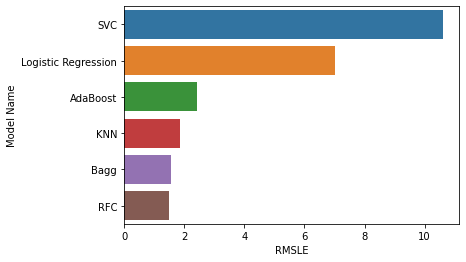

In [ ]:
sns.barplot(x=model_report['RMSLE'],y=model_report['Model Name'])
plt.show()

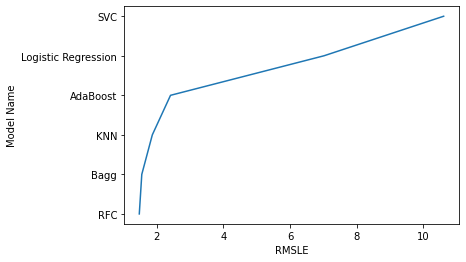

In [ ]:
sns.lineplot(x=model_report['RMSLE'],y=model_report['Model Name'])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
n_folds = 5
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfc = GridSearchCV(estimator= RandomForestRegressor(),
                   cv = n_folds,
                   param_grid = param_grid,
                   verbose=3,
                   n_jobs=-1,
                   return_train_score=True)
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, verbose=3)

In [ ]:
rfc.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=15)

In [ ]:
rfc.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 15}

In [ ]:
rfc.score(x_test,y_test)

0.388605291957283

In [ ]:
rfc1 = RandomForestRegressor(max_depth=10, n_estimators=12)

In [ ]:

rfc1.fit(x_train,y_train)
y_pred1 = rfc1.predict(x_test)

In [ ]:
rfc1.score(x_test,y_test)

0.3888841034661804

In [ ]:
print('RMSLE',metrics.mean_squared_log_error(y_test, y_pred1))

RMSLE 1.610753746931666


In [ ]:
from sklearn.metrics import confusion_matrix